In [1]:
#libraries
# Data
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Graphs
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesing & modelling 
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

In [2]:
# import data
# ==============================================================================
data_ = pd.read_csv("MaternalHealthRiskDataSet.csv")
print(data_.describe())
print(data_.info())


               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtyp

In [ ]:
d

In [23]:
# Crear copia del dataframe
data = data_.copy()

# Mapeo de categorías a números
mapping = {
    'low risk': 0,
    'mid risk': 1,
    'high risk': 2
}

# Reemplazar directamente la columna RiskLevel
data['RiskLevel'] = data_['RiskLevel'].map(mapping)

print(data.head())


   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86          2
1   35         140           90  13.0      98.0         70          2
2   29          90           70   8.0     100.0         80          2
3   30         140           85   7.0      98.0         70          2
4   35         120           60   6.1      98.0         76          0


In [24]:
target = data['RiskLevel'].tolist()

C:\Users\felip\AppData\Local\Temp\ipykernel_3680\2277021212.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajustar para que la barra no corte la figura


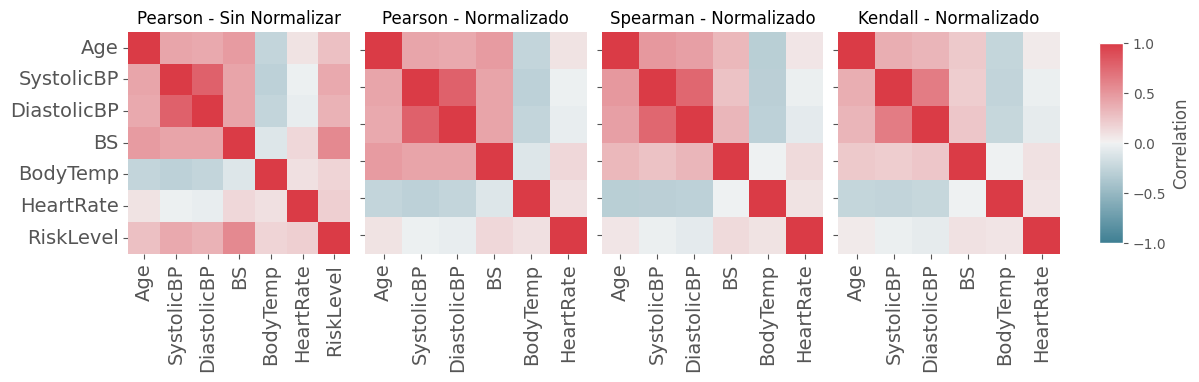

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def plot_correlations_horizontal(data):
    """
    Recibe un DataFrame sin normalizar y genera 4 mapas de calor en fila:
    1) Pearson - Sin Normalizar
    2) Pearson - Normalizado
    3) Spearman - Normalizado
    4) Kendall - Normalizado
    Solo se muestra etiqueta Y en el primer gráfico y se comparte una sola barra de color.
    """
    
    # Normalización
    df = data.copy()
    if 'RiskLevel' in df.columns:
        df_norm = (df.drop('RiskLevel', axis=1) - df.drop('RiskLevel', axis=1).min()) / \
                  (df.drop('RiskLevel', axis=1).max() - df.drop('RiskLevel', axis=1).min())
    else:
        df_norm = (df - df.min()) / (df.max() - df.min())
    
    # Crear figura 1x4
    fig, axes = plt.subplots(1, 4, figsize=(12, 10))
    
    # Lista de correlaciones y títulos
    corrs = [df.corr(), df_norm.corr(), df_norm.corr(method="spearman"), df_norm.corr(method="kendall")]
    titles = ["Pearson - Sin Normalizar", "Pearson - Normalizado", "Spearman - Normalizado", "Kendall - Normalizado"]
    
    # Dibujar los heatmaps sin colorbar
    for i, ax in enumerate(axes):
        sns.heatmap(corrs[i], mask=np.zeros_like(corrs[i], dtype=bool),
                    cmap=sns.diverging_palette(220, 10, as_cmap=True),
                    square=True, ax=ax, vmin=-1, vmax=1,
                    cbar=False)
        ax.set_title(titles[i], fontsize=12)
        ax.tick_params(axis='x', labelsize=14)  # tamaño etiquetas eje X
        ax.tick_params(axis='y', labelsize=14)  # tamaño etiquetas eje Y
        if i > 0:  # Ocultar etiquetas Y de los gráficos 2,3,4
            ax.set_yticklabels([])
            ax.set_ylabel("")
    
    # Agregar una sola barra de color a la derecha
    cbar_ax = fig.add_axes([0.92, 0.4, 0.02, 0.2])  # [left, bottom, width, height]
    norm = plt.Normalize(vmin=-1, vmax=1)
    sm = plt.cm.ScalarMappable(cmap=sns.diverging_palette(220, 10, as_cmap=True), norm=norm)
    sm.set_array([])
    fig.colorbar(sm, cax=cbar_ax, label="Correlation")
    
    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajustar para que la barra no corte la figura
    plt.show()

# Uso
plot_correlations_horizontal(data)


# Correlaciones

Text(0.5, 1.0, "Pearson's Correlation")

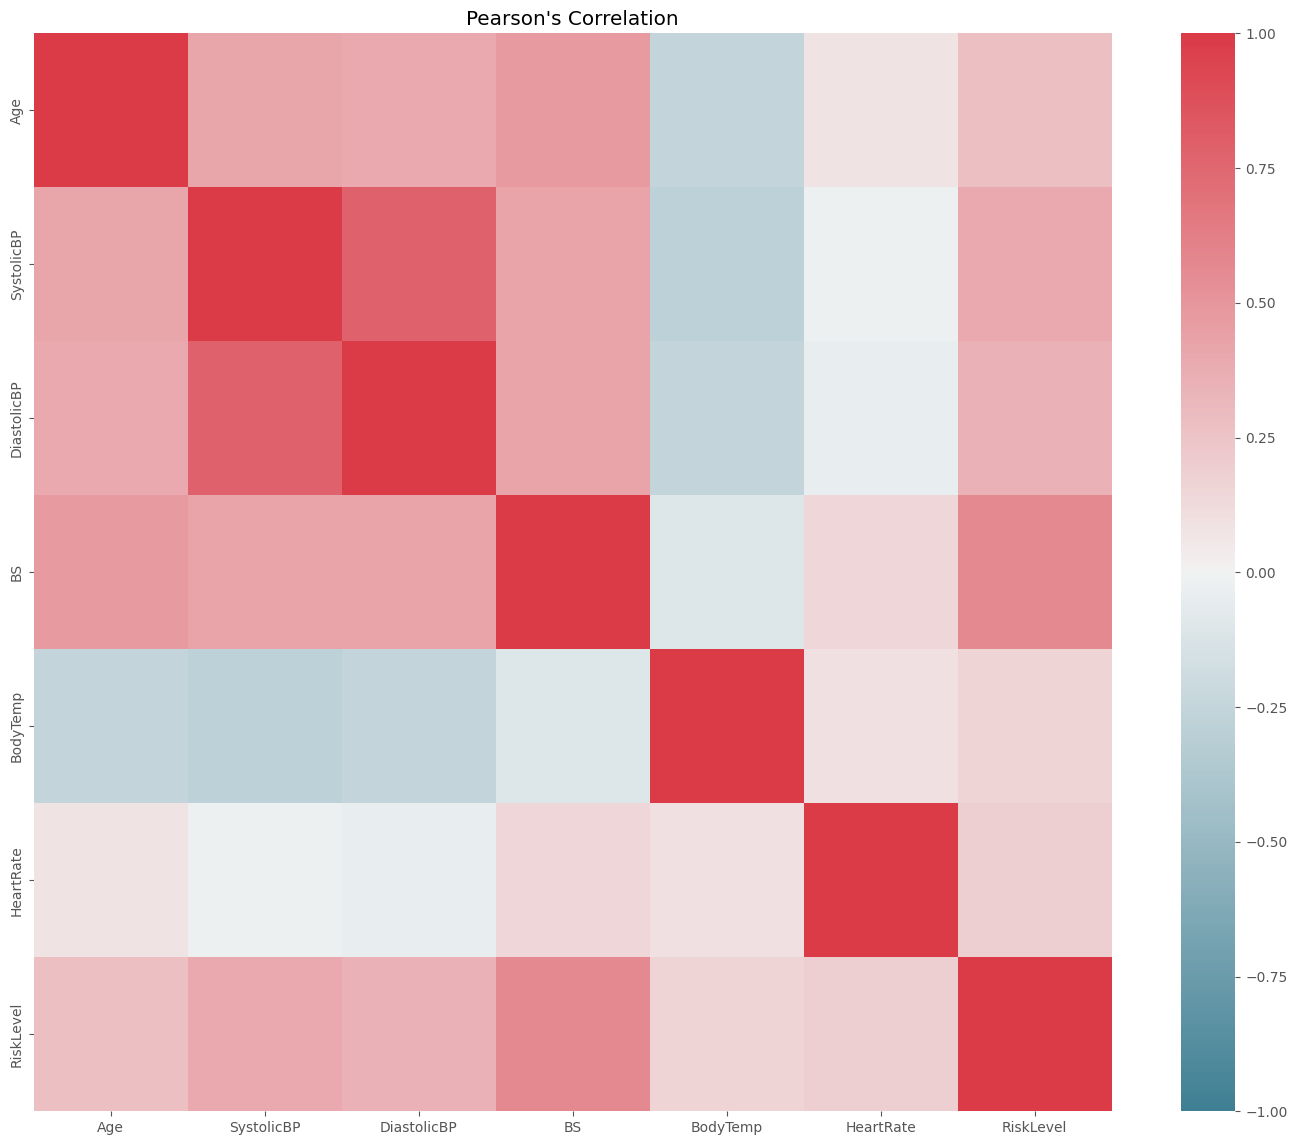

In [5]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(18, 14))
corr = data.corr()
sns_plot = sns.heatmap(corr, mask=np.zeros_like(corr,dtype=bool),
                       cmap=sns.diverging_palette(220, 10, as_cmap=True),
                       square=True, ax=ax,vmin=-1,vmax=1)
plt.title("Pearson's Correlation")


#sns_plot = sns.clustermap(my_df)
plt.title("Pearson's Correlation")

In [59]:
# clean & see
df = data.drop('RiskLevel', axis=1)
#normalize data
data = (df - df.min()) / (df.max() - df.min())

#scaler = MinMaxScaler()
#model = scaler.fit(df)
#db = model.transform(df)
#data = pd.DataFrame(df)
print(data.head(1))
print('')
print('Mean:')
print(data.mean(axis=0))
print('')
print('Variance:')
print(data.var(axis=0))
data.describe()

    Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate
0  0.25    0.666667     0.607843  0.692308       0.0   0.951807

Mean:
Age            0.331197
SystolicBP     0.479980
DiastolicBP    0.538442
BS             0.209691
BodyTemp       0.133018
HeartRate      0.810865
dtype: float64

Variance:
Age            0.050433
SystolicBP     0.041815
DiastolicBP    0.074131
BS             0.064186
BodyTemp       0.075228
HeartRate      0.009497
dtype: float64


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,0.331197,0.479980,0.538442,0.209691,0.133018,0.810865
std,0.224573,0.204488,0.272271,0.253349,0.274277,0.097454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150000,0.333333,0.313725,0.069231,0.000000,0.759036
50%,0.266667,0.555556,0.607843,0.115385,0.000000,0.831325
75%,0.483333,0.555556,0.803922,0.153846,0.000000,0.879518
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, "Pearson's Correlation")

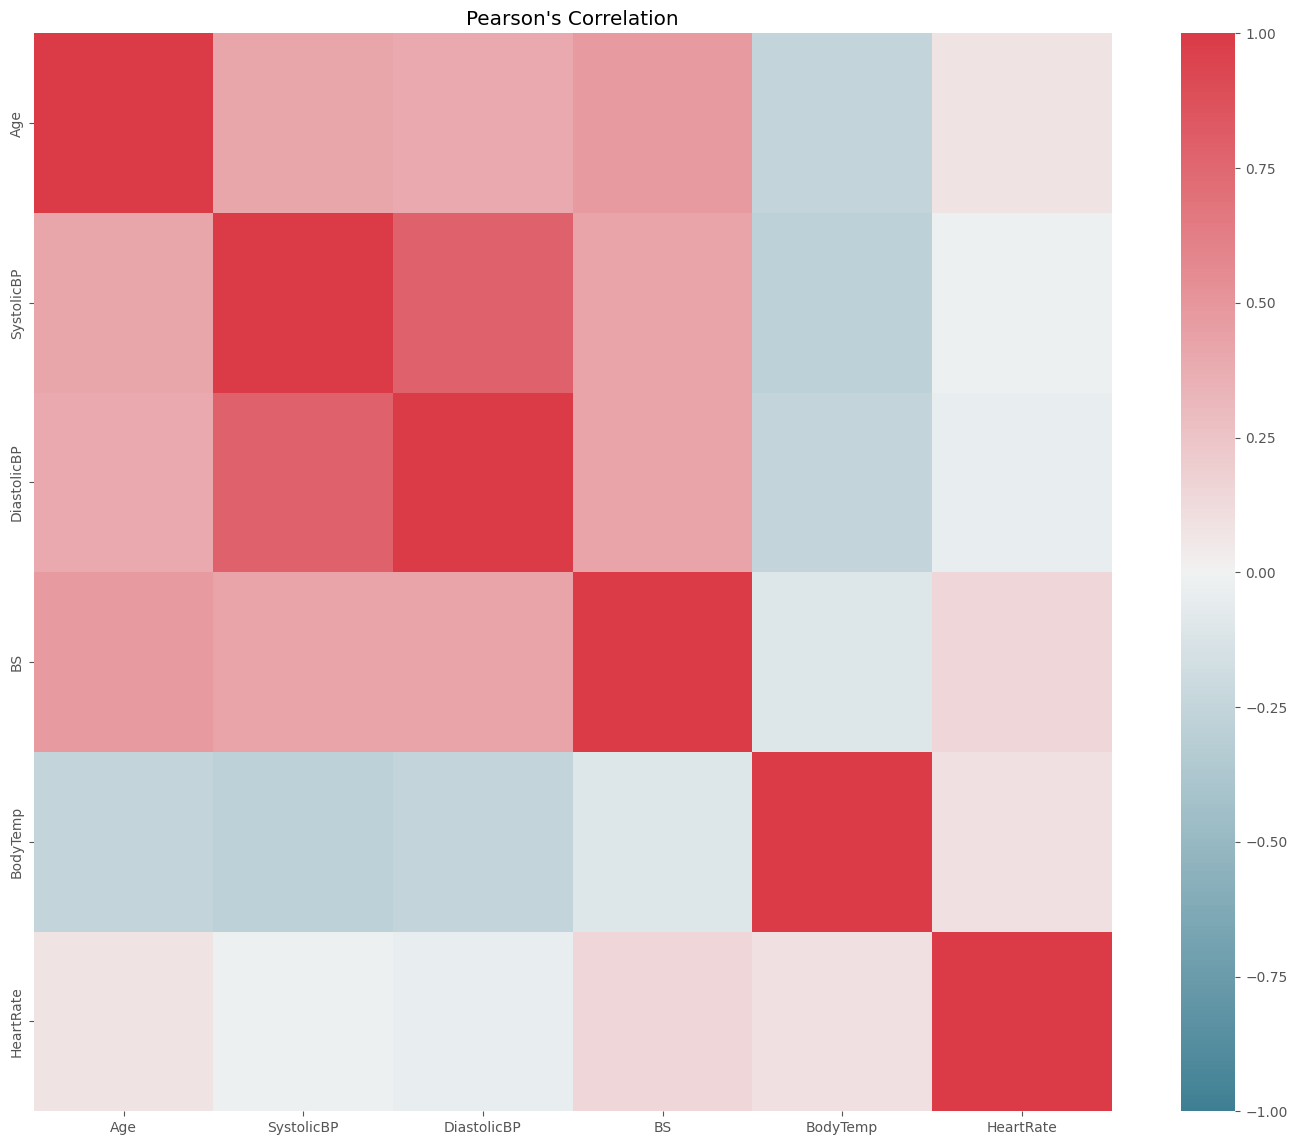

In [60]:
# run correlation matrix and plot
f2, ax2 = plt.subplots(figsize=(18, 14))
corr2 = data.corr()
sns_plot2 = sns.heatmap(corr2, mask=np.zeros_like(corr2, dtype=bool),
	cmap=sns.diverging_palette(220, 10, as_cmap=True),
	square=True, ax=ax2,vmin=-1,vmax=1)
plt.title("Pearson's Correlation")
#sns_plot = sns.clustermap(data)

Text(0.5, 1.0, "Spearman's Correlation")

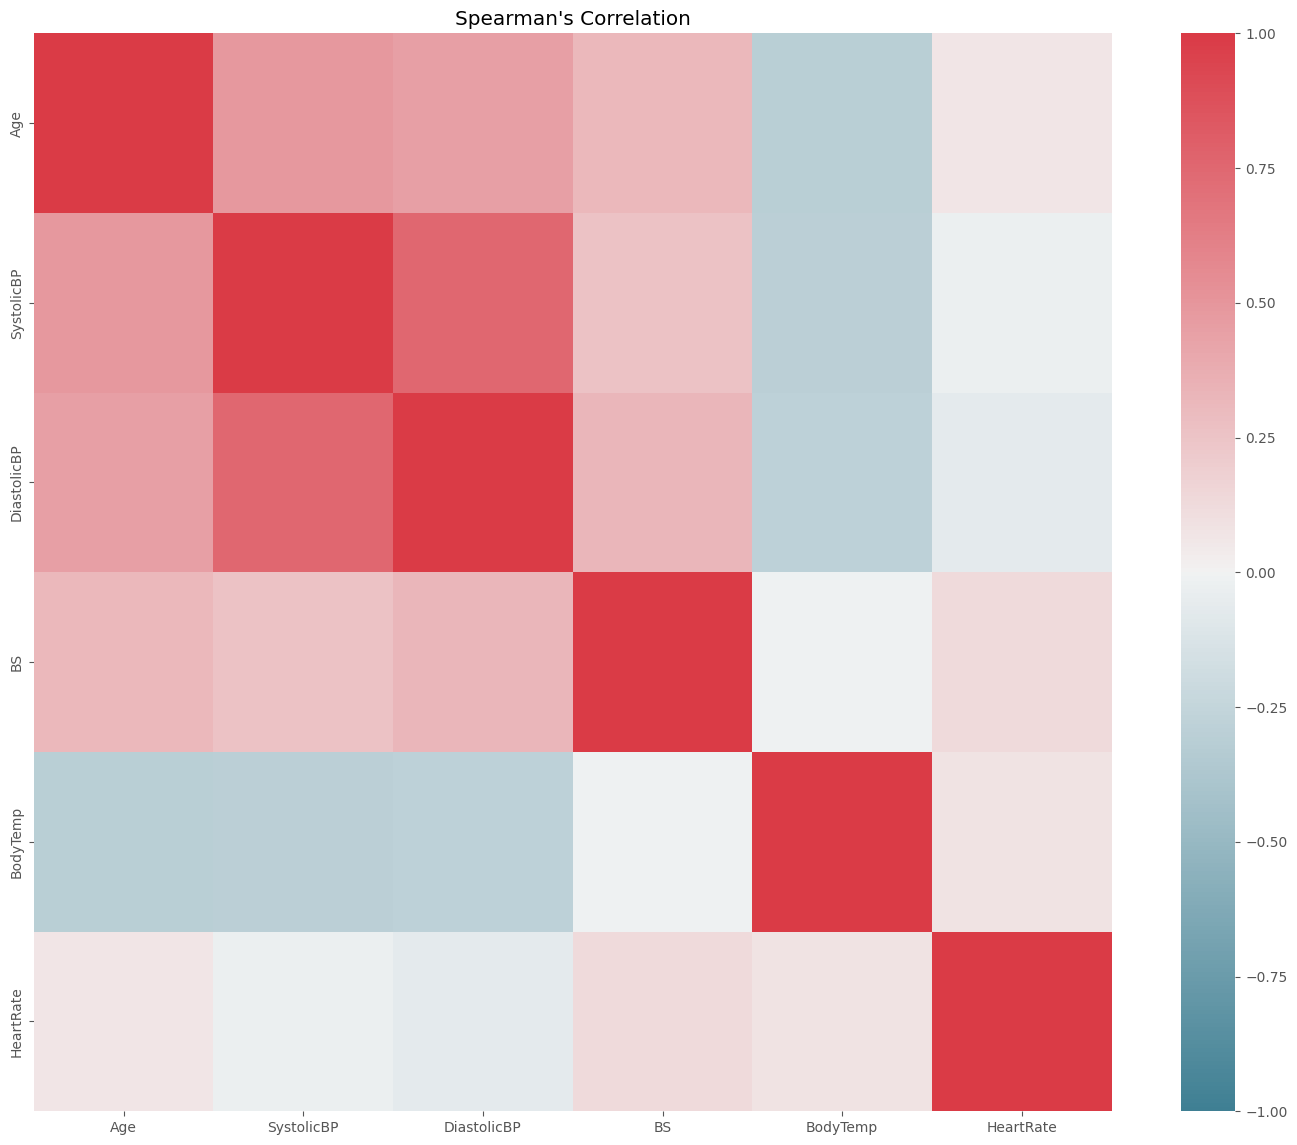

In [17]:
# run correlation matrix and plot
f3, ax3 = plt.subplots(figsize=(18, 14))
corr3 = data.corr(method="spearman")
sns_plot3 = sns.heatmap(corr3, mask=np.zeros_like(corr3, dtype=bool),
	cmap=sns.diverging_palette(220, 10, as_cmap=True),
	square=True, ax=ax3,vmin=-1,vmax=1)
plt.title("Spearman's Correlation")

Text(0.5, 1.0, "Kendall's Correlation")

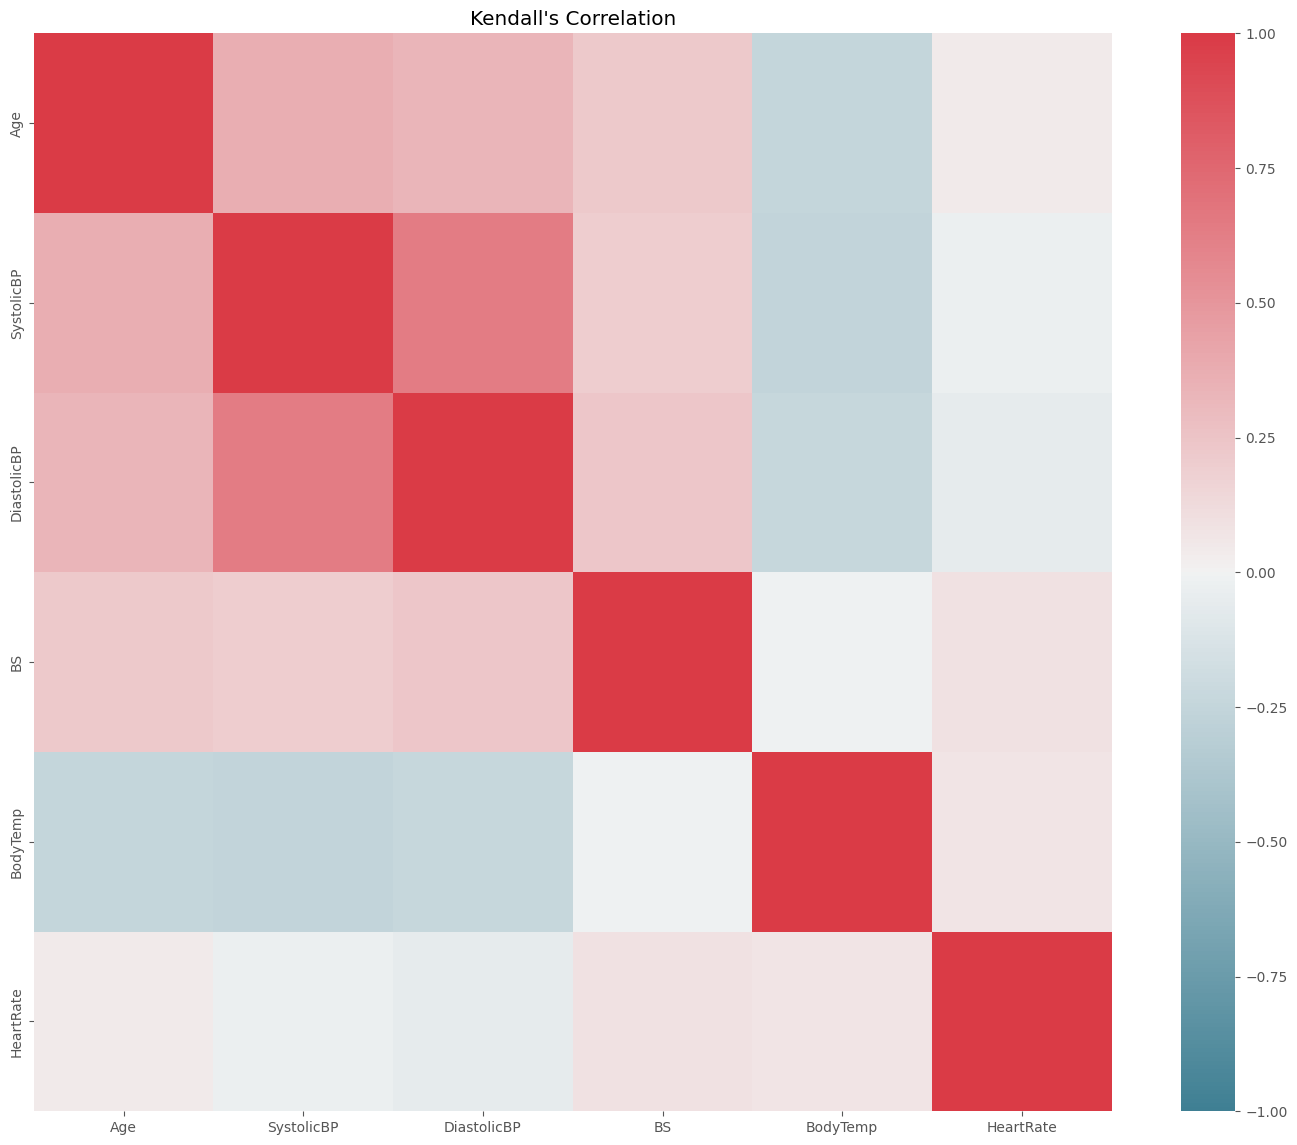

In [18]:
# run correlation matrix and plot
f4, ax4 = plt.subplots(figsize=(18, 14))
corr4 = data.corr(method="kendall")
#~ print(corr4)
sns_plot4 = sns.heatmap(corr4, mask=np.zeros_like(corr4, dtype=bool),
	cmap=sns.diverging_palette(220, 10, as_cmap=True),
	square=True, ax=ax4,vmin=-1,vmax=1)
plt.title("Kendall's Correlation")

# PCA

In [61]:
#PCA training
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data)

# Se extrae el modelo entrenado del pipeline
model_pca = pca_pipe.named_steps['pca']



# array to dataframe to add names.
dat=pd.DataFrame(
    data    = model_pca.components_,
    columns = data.columns,
    #index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13']
    #index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
)

print(dat)

        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate
0  0.436075    0.529602     0.522568  0.425529 -0.273509   0.020040
1  0.172902   -0.112900    -0.123042  0.352890  0.429320   0.795847
2 -0.240439    0.241584     0.299096  0.115351  0.809344  -0.354999
3  0.555093   -0.363373    -0.354416  0.425424  0.130541  -0.485999
4 -0.643211   -0.093867    -0.078101  0.707099 -0.260671  -0.058569
5 -0.016858    0.712434    -0.700439  0.010631  0.029144  -0.023998


In [64]:
dat

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,0.436075,0.529602,0.522568,0.425529,-0.273509,0.020040
1,0.172902,-0.112900,-0.123042,0.352890,0.429320,0.795847
2,-0.240439,0.241584,0.299096,0.115351,0.809344,-0.354999
3,0.555093,-0.363373,-0.354416,0.425424,0.130541,-0.485999
4,-0.643211,-0.093867,-0.078101,0.707099,-0.260671,-0.058569
5,-0.016858,0.712434,-0.700439,0.010631,0.029144,-0.023998


Text(0.5, 1.0, 'PCA components')

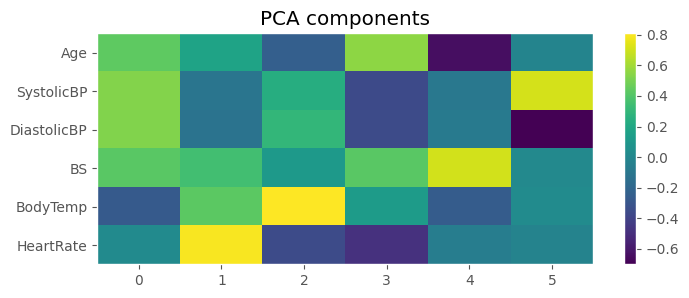

In [68]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))
components = model_pca.components_
plt.imshow(components.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(data.columns)), data.columns)
plt.xticks(range(len(data.columns)), dat.index)
plt.grid(False)
plt.colorbar()
plt.title("PCA components")
#fig.savefig("output_pca.png")


[0.4346489  0.6253791  0.76488741 0.88260984 0.96470041 1.        ]


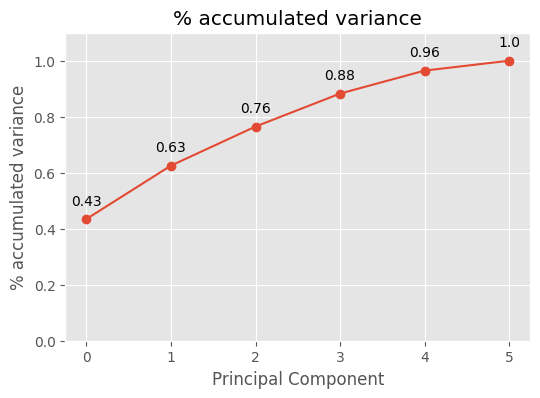

In [21]:
# % accumulated variance
# ==============================================================================
prop_variance_acum = model_pca.explained_variance_ratio_.cumsum()
print(prop_variance_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(data.columns)) + 1,
    prop_variance_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(data.columns)) + 1, prop_variance_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(model_pca.n_components_) + 1)
ax.set_xticklabels(dat.index)
ax.set_title('% accumulated variance')
ax.set_xlabel('Principal Component')
ax.set_ylabel('% accumulated variance');

fig.savefig("output_pca1.png")

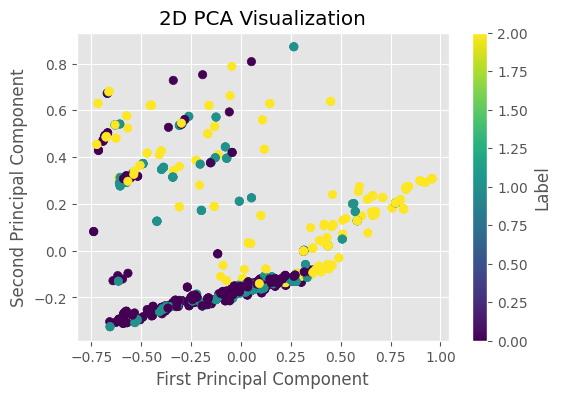

In [72]:
# Fit PCA to the data and transform it
pca_res = model_pca.fit_transform(data)
plt.figure(figsize=(6, 4))
scatter = plt.scatter(pca_res[:, 0], pca_res[:, 1], c=target, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D PCA Visualization')
plt.colorbar(scatter, label='Label') # Add a color bar for reference
plt.grid(True)
plt.show()

c:\python_env\biologia_computacional\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


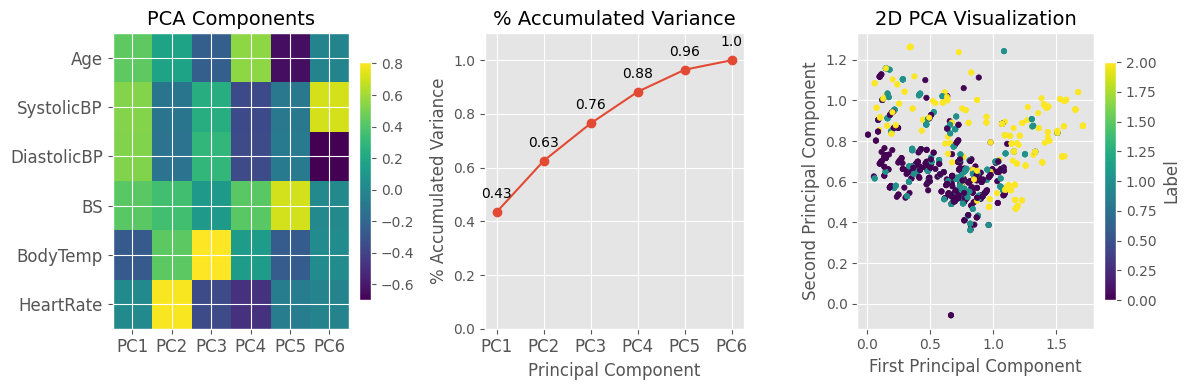

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

def plot_pca_all(data, target=None):
    """
    Recibe un DataFrame y un array de labels (target) y genera tres figuras de PCA en una fila:
    1) Heatmap de componentes principales
    2) % de varianza acumulada
    3) Scatter plot de las dos primeras componentes
    """
    
    # Entrenar PCA con pipeline
    pca_pipe = make_pipeline(StandardScaler(), PCA())
    pca_pipe.fit(data)
    model_pca = pca_pipe.named_steps['pca']
    
    # DataFrame de componentes
    dat = pd.DataFrame(data=model_pca.components_, columns=data.columns)
    
    # Crear figura 1x3
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    
    # -----------------------------
    # 1️⃣ Heatmap de componentes
    im = axes[0].imshow(model_pca.components_.T, cmap='viridis', aspect='auto')
    axes[0].set_yticks(range(len(data.columns)))
    axes[0].set_yticklabels(data.columns, fontsize=12)
    axes[0].set_xticks(range(model_pca.n_components_))
    axes[0].set_xticklabels([f'PC{i+1}' for i in range(model_pca.n_components_)], fontsize=12)
    axes[0].set_title("PCA Components", fontsize=14)
    fig.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)
    
    # -----------------------------
    # 2️⃣ % de varianza acumulada
    prop_variance_acum = model_pca.explained_variance_ratio_.cumsum()
    axes[1].plot(np.arange(len(data.columns)) + 1, prop_variance_acum, marker='o')
    for x, y in zip(np.arange(len(data.columns)) + 1, prop_variance_acum):
        axes[1].annotate(round(y,2), (x, y), textcoords="offset points", xytext=(0,10), ha='center')
    axes[1].set_ylim(0, 1.1)
    axes[1].set_xticks(np.arange(model_pca.n_components_) + 1)
    axes[1].set_xticklabels([f'PC{i+1}' for i in range(model_pca.n_components_)], fontsize=12)
    axes[1].set_title("% Accumulated Variance", fontsize=14)
    axes[1].set_xlabel("Principal Component", fontsize=12)
    axes[1].set_ylabel("% Accumulated Variance", fontsize=12)
    axes[1].grid(True)
    
    # -----------------------------
    # 3️⃣ Scatter plot de las dos primeras componentes
    pca_res = model_pca.transform(data)
    sc = axes[2].scatter(pca_res[:, 0], pca_res[:, 1], c=target, cmap='viridis', s=15)
    axes[2].set_xlabel("First Principal Component", fontsize=12)
    axes[2].set_ylabel("Second Principal Component", fontsize=12)
    axes[2].set_title("2D PCA Visualization", fontsize=14)
    axes[2].grid(True)
    if target is not None:
        fig.colorbar(sc, ax=axes[2], label='Label', fraction=0.046, pad=0.04)
    
    plt.tight_layout()
    plt.show()


# data: DataFrame de tus variables
# target: array de etiquetas para colorear scatter
plot_pca_all(data, target=target)
